In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
df = pd.read_csv('BaseBallPayers.csv')
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
df_transformed=pd.get_dummies(df, prefix=['League', 'Division','NewLeague'], columns=['League', 'Division','NewLeague'])
df_transformed

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,NaN,1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.0,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.0,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.0,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,960.0,1,0,1,0,1,0


In [6]:
test=df_transformed[df_transformed['Salary'].isna()]
y_test=test['Salary']
x_test=test.drop('Salary',axis=1)
train=df_transformed[~df_transformed.isnull().any(axis=1)]
y_train=train['Salary']
x_train=train.drop('Salary',axis=1)

In [7]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(x_train, y_train)
params = model.kernel_.get_params()
y_pred, std = model.predict(x_test, return_std=True)
print(model.score(x_train, y_train))

0.9601278308273994


In [8]:
your_column_vals = df['Salary'].values
your_custom_list = y_pred

i_custom = 0  # starting index on your iterator for your custom list
for i in range(len(your_column_vals)):
    if np.isnan(your_column_vals[i]):
        your_column_vals[i] = your_custom_list[i_custom]
        i_custom += 1  # increase the index

df['Salary'] = your_column_vals

df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,52.553992,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500000,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.000000,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.000000,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.000000,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.000000,A


In [9]:
df_transformed1=pd.get_dummies(df, prefix=['League', 'Division','NewLeague'], columns=['League', 'Division','NewLeague'])
df_transformed1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,...,446,33,20,52.553992,1,0,1,0,1,0
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.000000,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.000000,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.000000,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.500000,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,325,9,3,700.000000,0,1,1,0,0,1
318,492,136,5,76,50,94,12,5511,1511,39,...,313,381,20,875.000000,1,0,1,0,1,0
319,475,126,3,61,43,52,6,1700,433,7,...,37,113,7,385.000000,1,0,0,1,1,0
320,573,144,9,85,60,78,8,3198,857,97,...,1314,131,12,960.000000,1,0,1,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
y = df_transformed1['Salary']
X = df_transformed1.drop('Salary',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [11]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

def model_selection(X_train, Y_train):
    models = []
    models.append(('RFR', RandomForestRegressor()))
    models.append(('ADA', AdaBoostRegressor()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('GBR', GradientBoostingRegressor()))
    models.append(('SVM', SVR()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'neg_mean_absolute_percentage_error'
    for name, model in models:
        kfold = KFold(n_splits=5)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: MAPE: %f " % (name, abs(cv_results.mean()))
        print(msg)

In [12]:
model_selection(X_train, y_train)

RFR: MAPE: 0.439366 
ADA: MAPE: 0.889349 
KNN: MAPE: 0.479368 
CART: MAPE: 0.561319 
GBR: MAPE: 0.473414 
SVM: MAPE: 1.101004 


In [13]:
param_grid = {'bootstrap': [True,False], 
              'max_depth': [10, 20, 30, 40, 60], 
              'max_features': ['auto', 'log2',"sqrt"],
              'min_samples_leaf': [1, 2, 4, 5,8],
              'min_samples_split': [2, 5, 10,12,15],
              'n_estimators': [200, 400, 600, 800, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1,    # Number of jobs to run in parallel (-1 is to use all processors)
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

model = RandomForestRegressor(bootstrap=grid_search.best_params_['bootstrap'],
                               max_depth=grid_search.best_params_['max_depth'],
                               max_features=grid_search.best_params_['max_features'],
                               min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                               min_samples_split=grid_search.best_params_['min_samples_split'],
                               n_estimators=grid_search.best_params_['n_estimators'])
RF_model=model.fit(X_train,y_train)
y_pred_test_RF = RF_model.predict(X_test)
RF_SCORE=r2_score(y_test, y_pred_test_RF)
print("\nTest R2 using sklearn RF model:",
RF_SCORE)

Fitting 5 folds for each of 3750 candidates, totalling 18750 fits

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Test R2 using sklearn RF model: 0.6612362249909827


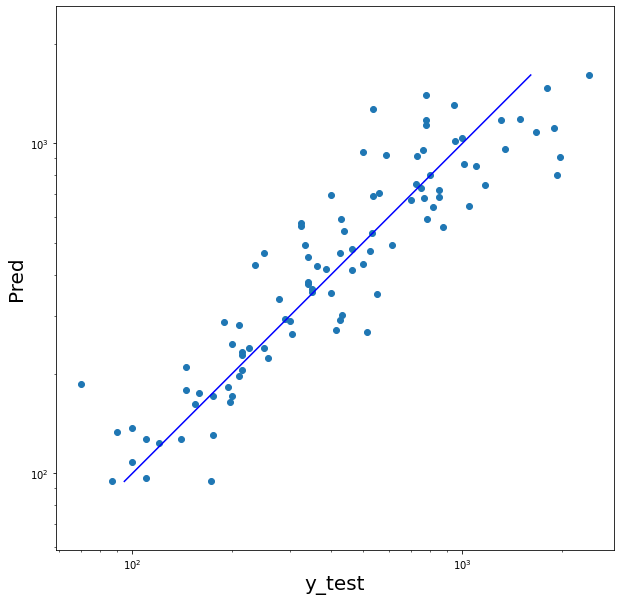

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_test_RF)
plt.yscale('log')
plt.xscale('log')

ax1 = max(max(y_pred_test_RF), max(y_pred_test_RF))
ax2 = min(min(y_pred_test_RF), min(y_pred_test_RF))
plt.plot([ax1, ax2], [ax1, ax2], 'b-')
plt.xlabel('y_test', fontsize=20)
plt.ylabel('Pred', fontsize=20)
plt.axis('equal')
plt.show() 